In [1]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [2]:
IMAGE_PATH = './images/pan1.jpg'

In [3]:
reader = easyocr.Reader(['ne'])
result = reader.readtext(IMAGE_PATH)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[1078, 188], [1452, 188], [1452, 269], [1078, 269]],
  'नेपाल सरकार',
  0.9698629771132857),
 ([[1091, 283], [1441, 283], [1441, 367], [1091, 367]],
  'अर्थ मन्त्रालय',
  0.5496495370283129),
 ([[1173, 373], [1596, 373], [1596, 494], [1173, 494]],
  ' राजृश्व विभाग',
  0.6404780745461294),
 ([[1046, 449], [1087, 449], [1087, 485], [1046, 485]],
  '%>',
  0.04420739901300185),
 ([[1182, 456], [1278, 456], [1278, 497], [1182, 497]],
  'राजरव',
  0.7217018189470851),
 ([[1331, 457], [1375, 457], [1375, 496], [1331, 496]],
  ' 7',
  0.10868233651523011),
 ([[1148, 496], [1240, 496], [1240, 537], [1148, 537]],
  'का्यालय ,',
  0.4482415241935899),
 ([[1113, 524], [1263, 524], [1263, 579], [1113, 579]],
  'ऐेवा रार्घालय',
  0.1095438286072485),
 ([[633, 599], [1787, 599], [1787, 707], [633, 707]],
  'स्थायी लेखा नम्बर (4ऩ) दर्ता प्रमाण',
  0.23362839896019058),
 ([[1979, 776], [2146, 776], [2146, 828], [1979, 828]],
  'दर्ता मिति',
  0.6849494698497005),
 ([[1703, 862], [1827, 862], [1827

In [4]:
result[20]

([[1386, 871], [1422, 871], [1422, 915], [1386, 915]], '३', 0.7564241483667935)

In [5]:
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX

In [6]:
for i in result:
    print(result)


[([[1078, 188], [1452, 188], [1452, 269], [1078, 269]], 'नेपाल सरकार', 0.9698629771132857), ([[1091, 283], [1441, 283], [1441, 367], [1091, 367]], 'अर्थ मन्त्रालय', 0.5496495370283129), ([[1173, 373], [1596, 373], [1596, 494], [1173, 494]], ' राजृश्व विभाग', 0.6404780745461294), ([[1046, 449], [1087, 449], [1087, 485], [1046, 485]], '%>', 0.04420739901300185), ([[1182, 456], [1278, 456], [1278, 497], [1182, 497]], 'राजरव', 0.7217018189470851), ([[1331, 457], [1375, 457], [1375, 496], [1331, 496]], ' 7', 0.10868233651523011), ([[1148, 496], [1240, 496], [1240, 537], [1148, 537]], 'का्यालय ,', 0.4482415241935899), ([[1113, 524], [1263, 524], [1263, 579], [1113, 579]], 'ऐेवा रार्घालय', 0.1095438286072485), ([[633, 599], [1787, 599], [1787, 707], [633, 707]], 'स्थायी लेखा नम्बर (4ऩ) दर्ता प्रमाण', 0.23362839896019058), ([[1979, 776], [2146, 776], [2146, 828], [1979, 828]], 'दर्ता मिति', 0.6849494698497005), ([[1703, 862], [1827, 862], [1827, 898], [1703, 898]], 'आयकर', 0.9443336978933541),

In [7]:
result[20]

([[1386, 871], [1422, 871], [1422, 915], [1386, 915]], '३', 0.7564241483667935)

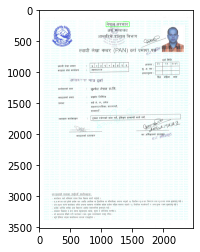

In [8]:
img = cv2.imread(IMAGE_PATH)
img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),5)
img = cv2.putText(img,text,top_left, font, 0.5,(255,255,255),2,cv2.LINE_AA)
plt.imshow(img)
plt.show()

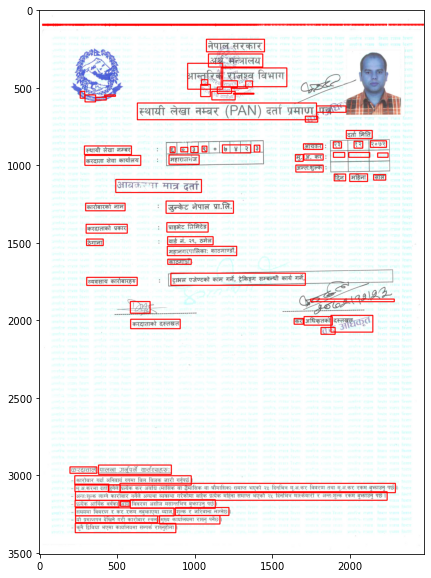

In [9]:
img = cv2.imread(IMAGE_PATH)
spacer = 100
for detection in result: 
    top_left = tuple([int(val) for val in detection[0][0]])
    bottom_right = tuple([int(val) for val in detection[0][2]])
    text = detection[1]
    font=cv2.FONT_HERSHEY_SIMPLEX
    img = cv2.rectangle(img,top_left,bottom_right,(255,0,0),5)
    img = cv2.putText(img,text,(20,spacer), font, 0.5,(255,0,0),2,cv2.LINE_AA)
    
plt.figure(figsize=(10,10))   
plt.imshow(img)
plt.show()

In [12]:
text=''
for i in range(len(result)):
  text=text+result[i][1] + '\n'

ls = ['अर्थ मन्त्रालय', 'आन्तरिक राजस्व', 'विभाग', 'दर्ता मिति', 'आयकर करदाता सेवा', 'कार्यालय','PAN']
matches = [match for match in ls if text in match]
 
print('It is a PAN card')

It is a PAN card
